In [ ]:
import pandas as pd
import os
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from scipy.stats import norm, skew #for some statistics
from scipy.special import boxcox1p




In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Change to a specific directory in Google Drive
directory_path = '/content/drive/My Drive/Kaggle_challenges/house-prices-advanced-regression-techniques'
os.chdir(directory_path)

# Verify the current working directory
print("Current Directory:", os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current Directory: /content/drive/My Drive/Kaggle_challenges/house-prices-advanced-regression-techniques


In [ ]:
train_file_path = "train.csv"
df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(df.shape))

df_test = pd.read_csv("test.csv")
print("Full test dataset shape is {}".format(df_test.shape))

Full train dataset shape is (1460, 81)
Full test dataset shape is (1459, 80)


In [ ]:
df.head(5)
df.info()

df = df.drop(columns=["Id"])
df_test = df_test.drop(columns=["Id"])

df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


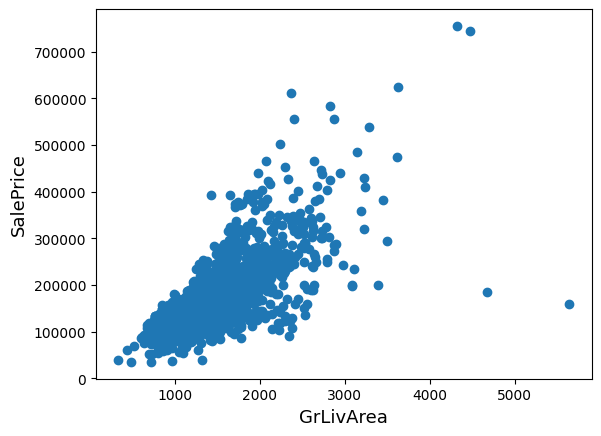

In [ ]:
# Outliers
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df["SalePrice"])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

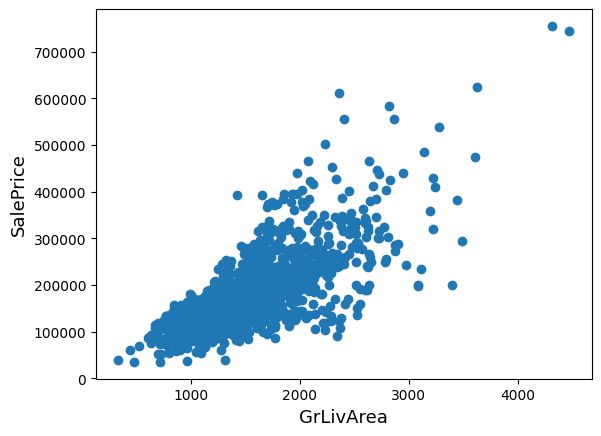

In [ ]:
# Remove outliers

#Deleting outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-131-6a48eeae7467>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, color='g', bins=100, hist_kws={'alpha': 0.4});


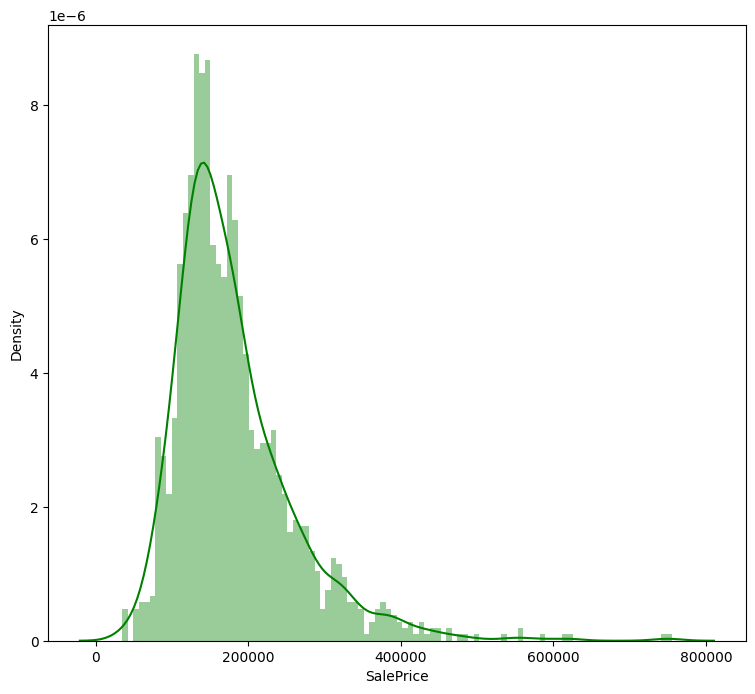

In [ ]:
y = df['SalePrice']
df = df.drop(columns=["SalePrice"])

print(y.describe())
plt.figure(figsize=(9, 8))
sns.distplot(y, color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
y = np.log1p(y)

<ipython-input-133-71eeb13a1bf7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, color='g', bins=100, hist_kws={'alpha': 0.4});


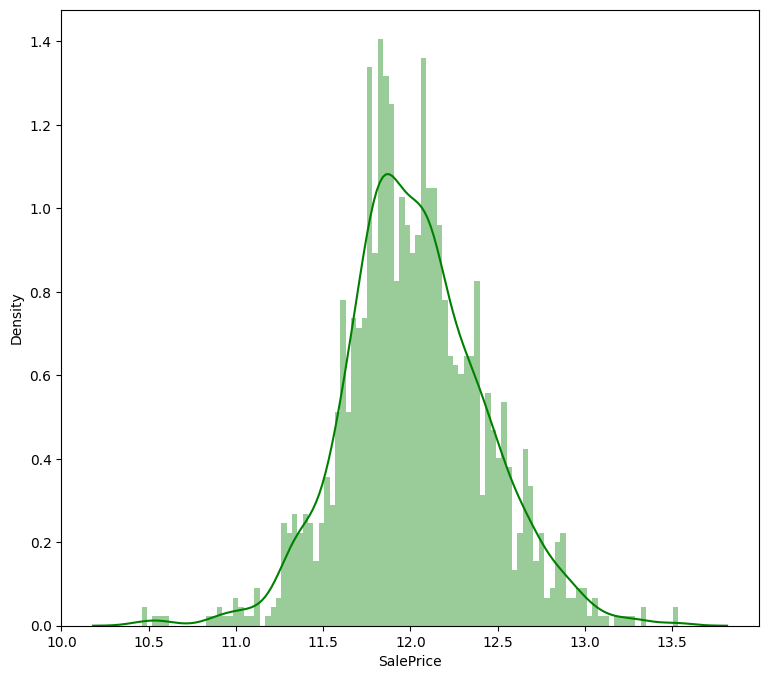

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(y, color='g', bins=100, hist_kws={'alpha': 0.4});

### Missing values handling
[link text](https://)

In [ ]:
df.shape

(1458, 79)

In [ ]:
df_test.shape

(1459, 79)

In [ ]:
ntrain = df.shape[0]
ntest = df_test.shape[0]
all_data = pd.concat((df, df_test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [ ]:
# Count missing values for each column
missing_values = df.isnull().sum()

# Display the result
print("Missing values in each column:")
print(missing_values[missing_values>0])

Missing values in each column:
LotFrontage      259
Alley           1367
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1177
MiscFeature     1404
dtype: int64


In [ ]:
# Count missing values for each column
missing_values = all_data.isnull().sum()

# Display the result
print("Missing values in each column:")
print(missing_values[missing_values>0])

Missing values in each column:
MSZoning           4
LotFrontage      486
Alley           2719
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2908
Fence           2346
MiscFeature     2812
SaleType           1
dtype: int64


In [ ]:
mean_value = all_data["LotFrontage"].mean()
all_data["LotFrontage"] = all_data["LotFrontage"].fillna(mean_value)

In [ ]:
# Alley
all_data["Alley"] = all_data["Alley"].fillna("NoAlAc")

In [ ]:
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [ ]:
# MasVnRType
most_frequent = all_data["MasVnrType"].mode().iloc[0]
all_data["MasVnrType"] = all_data["MasVnrType"].fillna(most_frequent)

In [ ]:
# Basement
all_data["BsmtQual"] = all_data["BsmtQual"].fillna("Nb") # Nb for No basement
all_data["BsmtCond"] = all_data["BsmtCond"].fillna("Nb") # Nb for No basement
all_data["BsmtExposure"] = all_data["BsmtExposure"].fillna("Nb") # Nb for No basement
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].fillna("NoB") # Nob for No basement
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].fillna("NoB") # Nob for No basement

In [ ]:
# Electrical
most_frequent = all_data["Electrical"].mode().iloc[0]
all_data["Electrical"] = all_data["Electrical"].fillna(most_frequent)

In [ ]:
# FireplaceQu
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("Nf")

In [ ]:
# Garage
# Categorical
all_data["GarageType"] = all_data["GarageType"].fillna("NoGar")
all_data["GarageFinish"] = all_data["GarageFinish"].fillna("Nog")
all_data["GarageQual"] = all_data["GarageQual"].fillna("Nb")
all_data["GarageCond"] = all_data["GarageCond"].fillna("Nb")

# Numerical
# most_frequent = all_data["GarageYrBlt"].mode().iloc[0]
all_data["GarageYrBlt"] = all_data["GarageYrBlt"].fillna(all_data["GarageYrBlt"].mode().iloc[0])
all_data["GarageArea"] = all_data["GarageArea"].fillna(0)
all_data["GarageCars"] = all_data["GarageCars"].fillna(0)


In [ ]:
# Pool
all_data["PoolQC"] = all_data["PoolQC"].fillna("Np") # Np for No pool

In [ ]:
all_data["Fence"] = all_data["Fence"].fillna("NoFe")

In [ ]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [ ]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [ ]:

all_data = all_data.drop(['Utilities'], axis=1)

In [ ]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [ ]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [ ]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [ ]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [ ]:
# Count missing values for each column
missing_values = all_data.isnull().sum()

# Display the result
print("Missing values in each column:")
print(missing_values[missing_values>0])

Missing values in each column:
Series([], dtype: int64)


In [ ]:
# Adding important features

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Dropping useless features
# all_data = all_data.drop(['Street'], axis=1)

useless = ['GarageYrBlt', 'YearRemodAdd']
all_data.drop(useless, axis=1, inplace=True)

### Skewed features

In [ ]:
all_data_num = all_data.select_dtypes(include = ['float64', 'int64'])
num_cols = all_data_num.columns


# Check the skew of all numerical features
skewed_feats = all_data[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
haspool,15.494756
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 41 skewed numerical features to Box Cox transform


### Encoding


In [ ]:
# Correlation
# train_with_y = all_data[:ntrain].copy(deep=True)
# train_with_y["SalePrice"] = y

# corr = train_with_y.corr()
# plt.subplots(figsize=(15,12))
# sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [ ]:
# Transforming some numerical variables that are in reality categorical

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['OverallQual'] = all_data['OverallQual'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [ ]:
 # dtypes: float64(3), int64(35), object(43)
all_data_num = all_data.select_dtypes(include = ['float64', 'int64'])
num_cols = all_data_num.columns
all_data_num.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,ScreenPorch,PoolArea,MiscVal,TotalSF,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,5.831328,19.212182,14.187527,8.059126,11.170327,0.0,7.483296,11.692623,11.692623,11.686189,...,0.0,0.0,0.0,14.976591,5.714669,0.0,0.730463,0.730463,0.730463,0.000000
1,6.221214,19.712205,14.145138,0.000000,12.062832,0.0,8.897844,12.792276,12.792276,0.000000,...,0.0,0.0,0.0,14.923100,9.010206,0.0,0.000000,0.730463,0.730463,0.730463
2,5.914940,20.347241,14.184404,7.646538,10.200343,0.0,9.917060,11.892039,11.892039,11.724598,...,0.0,0.0,0.0,15.149678,5.053371,0.0,0.730463,0.730463,0.730463,0.730463
3,5.684507,19.691553,14.047529,0.000000,8.274266,0.0,10.468500,11.354094,12.013683,11.354094,...,0.0,0.0,0.0,14.857121,9.080098,0.0,0.730463,0.730463,0.730463,0.730463
4,6.314735,21.325160,14.182841,9.391827,10.971129,0.0,10.221051,12.510588,12.510588,12.271365,...,0.0,0.0,0.0,15.852312,8.831514,0.0,0.730463,0.730463,0.730463,0.730463


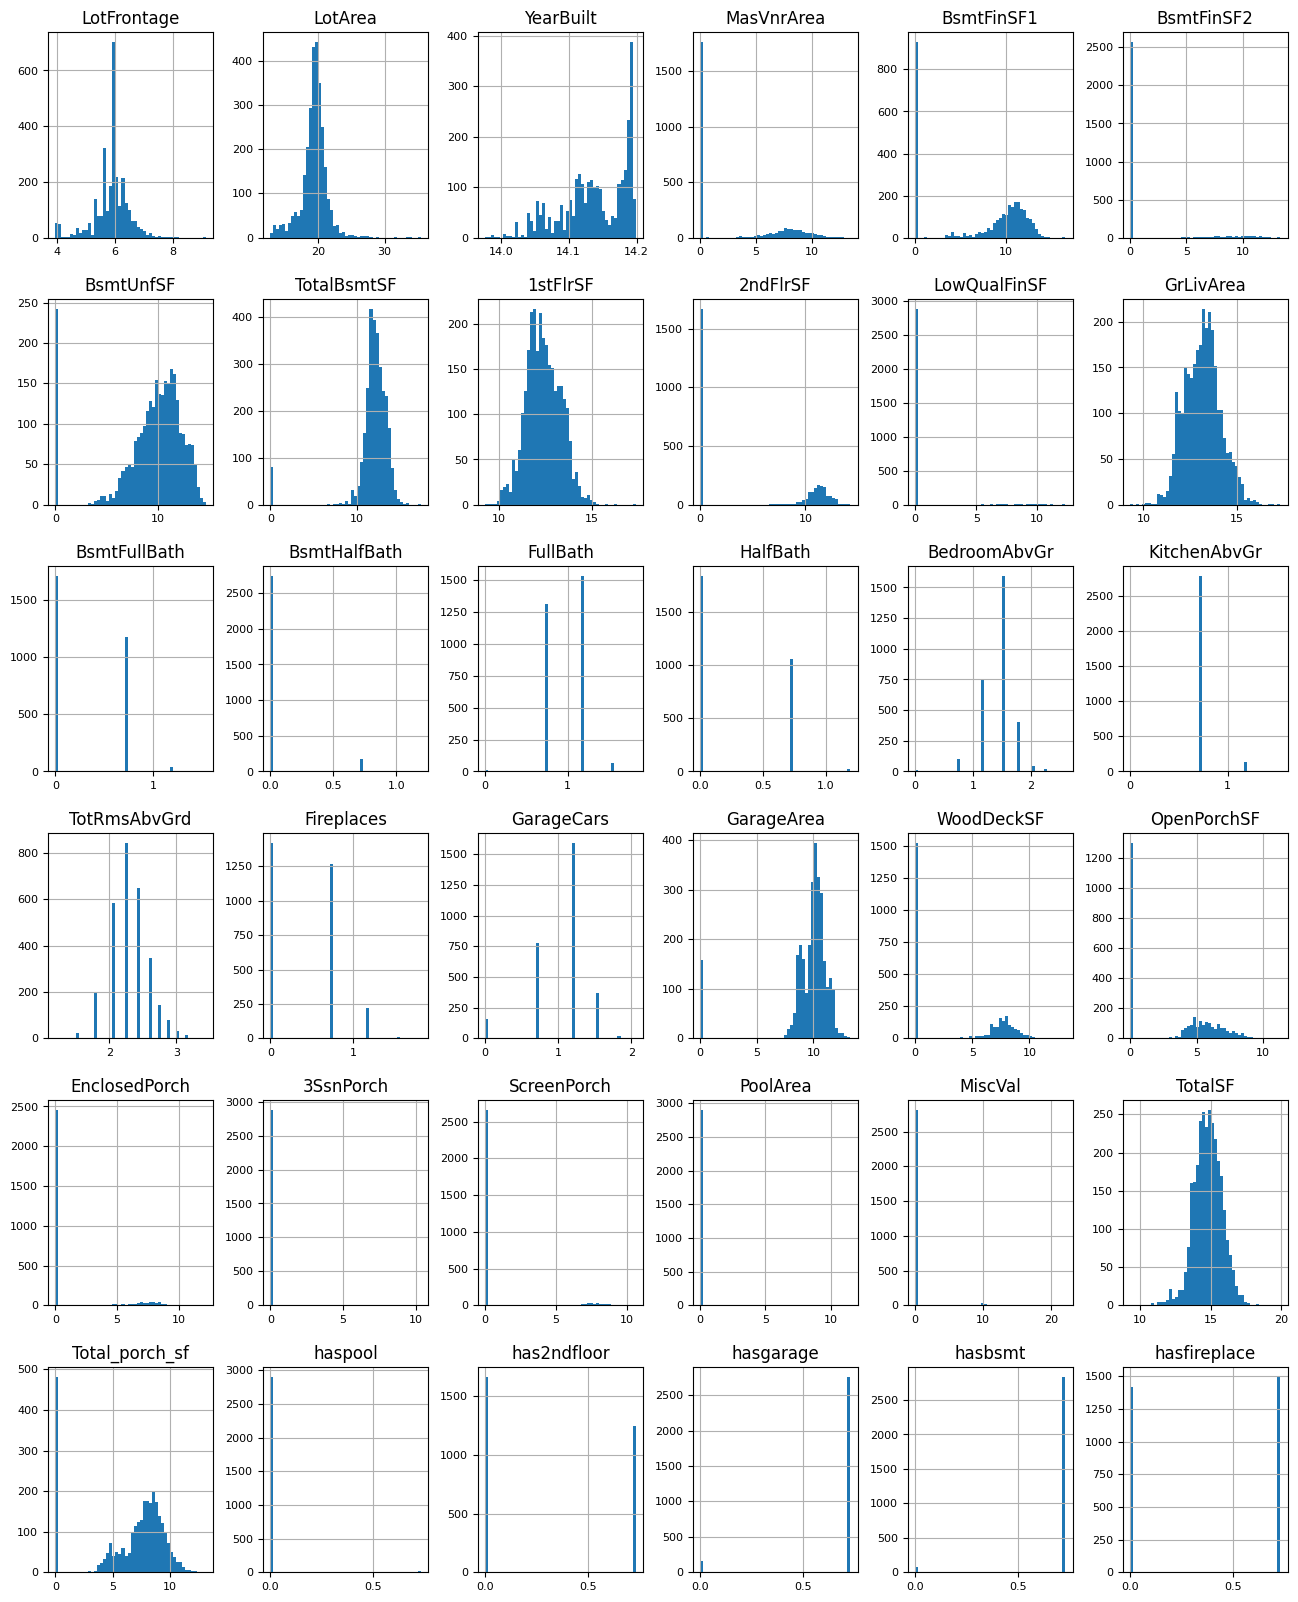

In [ ]:
all_data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
to_standardize = ["LotFrontage", "TotalBsmtSF","1stFlrSF","GrLivArea","TotRmsAbvGrd","GarageArea"]
to_normalize = [i for i in num_cols if i not in to_standardize]

In [ ]:
# Standardize and Normalize
# Initialize the scalers
# scaler_standard = StandardScaler()  # For standardization
# scaler_minmax = MinMaxScaler()      # For normalization

# all_data[to_standardize] = scaler_standard.fit_transform(all_data[to_standardize])
# all_data[to_normalize] = scaler_minmax.fit_transform(all_data[to_normalize])

In [ ]:
# Standardize
# scaler_standard = StandardScaler()  # For standardization

# all_data[num_cols] = scaler_standard.fit_transform(all_data[num_cols])


In [ ]:
# robust_scaler = RobustScaler()

# all_data[num_cols] = robust_scaler.fit_transform(all_data[num_cols])

#### Categorical encoding

At first I just try label encoding for all categorical features

In [ ]:
# # Label Encoding
# cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
#         'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
#         'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#         'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
#         'YrSold', 'MoSold') #'Street'
# # process columns, apply LabelEncoder to categorical features
# for c in cols:
#     lbl = LabelEncoder()
#     lbl.fit(list(all_data[c].values))
#     all_data[c] = lbl.transform(list(all_data[c].values))


In [ ]:
# Hot One Encoding
all_data = pd.get_dummies(all_data)

### Re-Split data

In [ ]:
X = all_data[:ntrain]
test = all_data[ntrain:]

outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

# Not used in the end because we use cross validation
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Modeling

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = make_pipeline(RobustScaler(), KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5))



GBoost = GradientBoostingRegressor(n_estimators=6000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=600,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1043 (0.0060)



In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1043 (0.0060)



In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1122 (0.0050)



In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1128 (0.0071)



In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:11:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:11:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:11:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:11:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:11:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarn

Xgboost score: 0.1161 (0.0042)



In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]

        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self

    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1041 (0.0057)



### Adding meta model

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin): # StackingCVRegressor, sklearn version
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index]) # instance.fit(X[train_index], y[train_index])
                print(f"model {i} trained")
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        print("Training the meta model...")
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    #Do the predictions of all base models on the test data and use the averaged predictions as
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
def rmsle_cv_stacked(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, y.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)
# stacked_averaged_models.fit(X,y)

score = rmsle_cv_stacked(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

model 0 trained
model 0 trained
model 0 trained
model 0 trained
model 0 trained
model 1 trained
model 1 trained
model 1 trained
model 1 trained
model 1 trained
model 2 trained
model 2 trained
model 2 trained
model 2 trained
model 2 trained
Training the meta model...
model 0 trained
model 0 trained
model 0 trained
model 0 trained
model 0 trained
model 1 trained
model 1 trained
model 1 trained
model 1 trained
model 1 trained
model 2 trained
model 2 trained
model 2 trained
model 2 trained
model 2 trained
Training the meta model...
model 0 trained
model 0 trained
model 0 trained
model 0 trained
model 0 trained
model 1 trained
model 1 trained
model 1 trained
model 1 trained
model 1 trained
model 2 trained
model 2 trained
model 2 trained
model 2 trained
model 2 trained
Training the meta model...
model 0 trained
model 0 trained
model 0 trained
model 0 trained
model 0 trained
model 1 trained
model 1 trained
model 1 trained
model 1 trained
model 1 trained
model 2 trained
model 2 trained
model 2

### Ensembling StackedRegressor, XGBoost and LightGBM

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
stacked_averaged_models.fit(X.values, y.values)
stacked_train_pred = stacked_averaged_models.predict(X.values)
stacked_test_pred = stacked_averaged_models.predict(test.values)

print(rmsle(y, stacked_train_pred))

model 0 trained
model 0 trained
model 0 trained
model 0 trained
model 0 trained
model 1 trained
model 1 trained
model 1 trained
model 1 trained
model 1 trained
model 2 trained
model 2 trained
model 2 trained
model 2 trained
model 2 trained
Training the meta model...
0.0737040038066359


In [ ]:
model_xgb.fit(X, y)
xgb_train_pred = model_xgb.predict(X)
xgb_test_pred = model_xgb.predict(test)
print(rmsle(y, xgb_train_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:29:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


0.08688880925286398


In [ ]:
model_lgb.fit(X, y)
lgb_train_pred = model_lgb.predict(X)
lgb_test_pred = model_lgb.predict(test)
print(rmsle(y, lgb_train_pred))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.23

In [ ]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07257042345894069


In [ ]:
test_pred = stacked_test_pred*0.70 + xgb_test_pred*0.15 + lgb_test_pred*0.15

In [ ]:
submission = pd.read_csv('sample_submission.csv')
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred
submission.head()
submission.to_csv("submission.csv", index=False, header=True)